In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.dates import DateFormatter
from collections import Counter
import seaborn as sns

sns.set_theme()
sns.set_context("paper")
sns.set_palette("colorblind")

colors = sns.color_palette("colorblind")


In [12]:
# Loading in SOPHIE Data
sophie80df = pd.read_csv("Data/SOPHIE_EPT80_1990-2022.csv", low_memory=False)
sophie80df['Date_UTC'] = pd.to_datetime(sophie80df['Date_UTC'])
sophie80df = sophie80df[sophie80df['Date_UTC'].between('1996','2022')].reset_index(drop=True)
sophie80df['Duration'] = np.append(np.diff(sophie80df['Date_UTC']), np.array([pd.to_timedelta(0,'h')],dtype=np.timedelta64))
sophie80df['Delbay'] = pd.to_numeric(sophie80df['Delbay'],errors='coerce')
sophie80df = sophie80df[sophie80df['Date_UTC'].between('1996','2014')]

array = np.zeros(len(sophie80df['Date_UTC']),dtype=int)
for i, __ in sophie80df.iloc[2:-2].iterrows():
    if (sophie80df.iloc[i-1]['Phase']==1) and (sophie80df.iloc[i]['Phase']==2) and (sophie80df.iloc[i]['Flag']==0) and (sophie80df.iloc[i+1]['Phase']==3):# and (sophie80df.iloc[i+2]['Phase']==1):
        array[i] = 1
        continue
    if (sophie80df.iloc[i-1]['Phase']==3) and (sophie80df.iloc[i-1]['Flag']==0) and (sophie80df.iloc[i]['Phase'] == 2) and (sophie80df.iloc[i]['Flag']==0) and (sophie80df.iloc[i+1]['Phase'] == 3):
        array[i] = 2
        continue
    else:
        array[i] = 0
        continue
array[0] = 1
sophie80df['Type'] = array

# array = np.zeros(len(sophie80df['Date_UTC']),dtype=int)
# for i, __ in sophie80df.iloc[2:-2].iterrows():
    
#     else:
#         array[i] = 0
#         continue

# sophie80df['Compound'] = array


In [5]:
sophie80df.iloc[:50]

,Date_UTC,Phase,Flag,MLT,MLat,Delbay,SML Val at End,Duration,Type
0,1996-01-01 11:19:00,2,0,4.0,69.0,-138.0,-318.0,0 days 00:10:00,1
1,1996-01-01 11:29:00,3,0,1.0,66.0,222.0,-96.0,0 days 00:28:00,0
2,1996-01-01 11:57:00,1,0,5.0,71.0,40.0,-56.0,0 days 07:48:00,0
3,1996-01-01 19:45:00,2,0,3.0,65.0,-160.0,-216.0,0 days 00:10:00,1
4,1996-01-01 19:55:00,3,0,1.0,68.0,120.0,-96.0,0 days 00:08:00,0
5,1996-01-01 20:03:00,2,0,4.0,65.0,-398.0,-494.0,0 days 00:23:00,2
6,1996-01-01 20:26:00,3,0,22.0,71.0,418.0,-76.0,0 days 01:13:00,0
7,1996-01-01 21:39:00,1,0,23.0,73.0,38.0,-38.0,0 days 01:52:00,0
8,1996-01-01 23:31:00,2,0,1.0,67.0,-279.0,-317.0,0 days 00:17:00,1
9,1996-01-01 23:48:00,3,0,0.0,70.0,246.0,-71.0,0 days 00:34:00,0


In [7]:
Isolated_Onsets = sophie80df[sophie80df['Type']==1]
isolated_wt_array = np.diff(Isolated_Onsets['Date_UTC'])/pd.to_timedelta('1h')
isolated_wt_array_cut = isolated_wt_array[isolated_wt_array<10]
fig, axes = plt.subplots(figsize=(10,6))

sns.histplot(isolated_wt_array_cut, bins=np.arange(0,10.25,0.25), ax=axes, stat='percent', label='Isolated EPT80: Mean: {:.2f}, Std. Dev: {:.2f}, Median: {:.2f}'.format(np.nanmean(isolated_wt_array_cut),np.nanstd(isolated_wt_array_cut),np.nanmedian(isolated_wt_array_cut)))
axes.xaxis.set_major_locator(ticker.MultipleLocator(2))
axes.set_ylim(0,14.5)
axes.legend(loc='center right')
axes.set_xlabel('Waiting Time (Hours)')
axes.set_ylabel('Probability (%)')


Text(0, 0.5, 'Probability (%)')

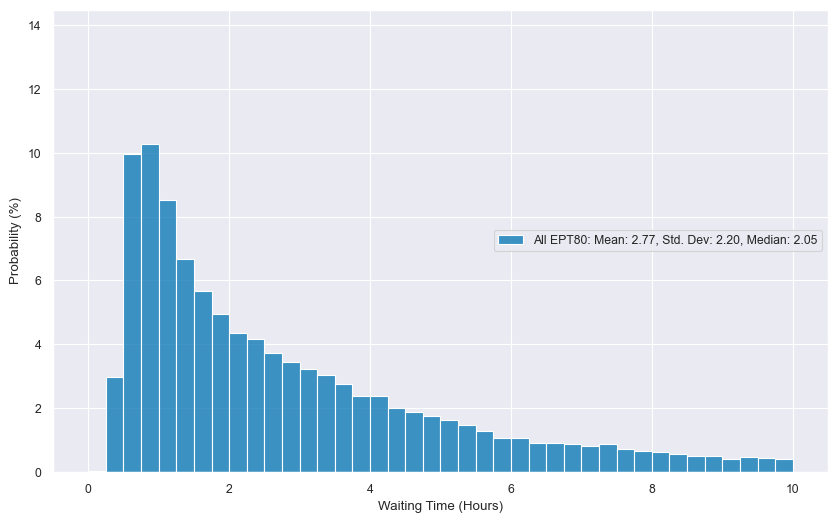

In [18]:
allonsets = sophie80df.iloc[np.intersect1d(np.where(sophie80df['Phase']==2),np.where(sophie80df['Flag']==0))]
allonsets_wt_array = np.diff(allonsets['Date_UTC'])/pd.to_timedelta('1h')
allonsets_wt_array_cut = allonsets_wt_array[allonsets_wt_array<10]
fig, axes = plt.subplots(figsize=(10,6))

sns.histplot(allonsets_wt_array_cut, bins=np.arange(0,10.25,0.25), ax=axes, stat='percent', label='All EPT80: Mean: {:.2f}, Std. Dev: {:.2f}, Median: {:.2f}'.format(np.nanmean(allonsets_wt_array_cut),np.nanstd(allonsets_wt_array_cut),np.nanmedian(allonsets_wt_array_cut)))
axes.xaxis.set_major_locator(ticker.MultipleLocator(2))
axes.set_ylim(0,14.5)
axes.legend(loc='center right')
axes.set_xlabel('Waiting Time (Hours)')
axes.set_ylabel('Probability (%)')
